# Import Lib

In [348]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Import Csv

In [350]:
chunksize = 10 ** 3  # Chunksize de 1000 lignes
filename = 'products.csv'
nan_rates = []

try:
    # Lecture du fichier CSV par chunks
    reader = pd.read_csv(filename, chunksize=chunksize, sep='\t')

    for chunk in reader:
        # Calculer le taux de NaN pour chaque chunk
        nan_rates.append(chunk.isna().mean(axis=0))

except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

# Calcul des taux moyens de remplissage des chunks
if nan_rates:
    inds_nan_rate = pd.concat(nan_rates, axis=1).mean(axis=1)

    # Sélection des colonnes à charger en fonction des taux de NaN
    cols_to_load = inds_nan_rate[inds_nan_rate < 0.7].index.tolist()

    # Chargement des données filtrées
    df = pd.read_csv(filename, sep='\t', usecols=cols_to_load)
    df = df.drop(['url','creator','created_datetime','food_groups_tags','food_groups_en','states_tags','sodium_100g','states_en','last_image_datetime','last_modified_t','last_modified_datetime','created_t','last_modified_by','main_category_en','image_url','image_small_url','last_updated_t','last_image_t','brands_tags','last_updated_datetime','categories_en','categories_tags','countries_tags','countries_en'], axis=1)

    # Affichage de la première partie du dataframe pour vérifier
    print(df.head())

ParserError: Error tokenizing data. C error: Expected 206 fields in line 1537879, saw 234



/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_9945/3644886759.py:24: DtypeWarning: Columns (0,50,52,56,58,88,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep='\t', usecols=cols_to_load)


                     code      product_name   brands  \
0       00000000000000225    jeunes pousses  endives   
1  0000000000000207025004             Andrè      NaN   
2    00000000000003429145           L.casei      NaN   
3    00000000000026772226              Skyr   Danone   
4           0000000000017  Vitória crackers      NaN   

                                          categories  countries  \
0  Aliments et boissons à base de végétaux, Alime...  en:france   
1                                                NaN      en:de   
2                                                NaN      Spain   
3  Produits laitiers, Produits fermentés, Dessert...     France   
4                                                NaN     France   

                                    ingredients_text  \
0                                                NaN   
1                                                NaN   
2  Leche semidesnatada, azucar 6.9%, leche desnat...   
3                                   

# Information de base

In [352]:
df.info

<bound method DataFrame.info of                            code               product_name     brands  \
0             00000000000000225             jeunes pousses    endives   
1        0000000000000207025004                      Andrè        NaN   
2          00000000000003429145                    L.casei        NaN   
3          00000000000026772226                       Skyr     Danone   
4                 0000000000017           Vitória crackers        NaN   
...                         ...                        ...        ...   
3307654              9999999999            Duschgel - Iris        NaN   
3307655             99999999999        Sugo alle Melanzone  La Vialla   
3307656            999999999999       Test Product Product        MTR   
3307657           9999999999994  Light & Free SKYR A BOIRE        NaN   
3307658           9999999999999                 Salatgurke      Edeka   

                                                categories   countries  \
0        Aliments

In [353]:
df.head(5)

,code,product_name,brands,categories,countries,ingredients_text,ingredients_tags,ingredients_analysis_tags,serving_size,serving_quantity,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,00000000000000225,jeunes pousses,endives,"Aliments et boissons à base de végétaux, Alime...",en:france,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,Andrè,NaN,NaN,en:de,NaN,NaN,NaN,NaN,NaN,...,690.0,2.0,2.0,65.0,12.6,3.0,1.5,NaN,NaN,NaN
2,00000000000003429145,L.casei,NaN,NaN,Spain,"Leche semidesnatada, azucar 6.9%, leche desnat...","en:semi-skimmed-milk,en:dairy,en:milk,en:sugar...","en:palm-oil-free,en:non-vegan,en:vegetarian-st...",NaN,NaN,...,NaN,1.4,0.9,9.8,9.8,NaN,2.7,0.10,0.0,NaN
3,00000000000026772226,Skyr,Danone,"Produits laitiers, Produits fermentés, Dessert...",France,NaN,NaN,NaN,NaN,NaN,...,238.0,0.2,0.1,3.9,3.9,NaN,10.0,0.09,NaN,-5.0
4,0000000000017,Vitória crackers,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,NaN,NaN


In [354]:
df.dtypes

code                                                      object
product_name                                              object
brands                                                    object
categories                                                object
countries                                                 object
ingredients_text                                          object
ingredients_tags                                          object
ingredients_analysis_tags                                 object
serving_size                                              object
serving_quantity                                          object
additives_n                                               object
nutriscore_score                                          object
nutriscore_grade                                          object
nova_group                                                object
pnns_groups_1                                             object
pnns_groups_2            

# Doublons

In [356]:
for column in df.columns:
    doublons = df[column].duplicated().sum()
    print(f"Column: {column}")
    print(doublons)

Column: code
2839
Column: product_name
1360930
Column: brands
3004665
Column: categories
3095193
Column: countries
3290344
Column: ingredients_text
2480494
Column: ingredients_tags
2583022
Column: ingredients_analysis_tags
3307613
Column: serving_size
3237821
Column: serving_quantity
3303520
Column: additives_n
3307600
Column: nutriscore_score
3307556
Column: nutriscore_grade
3307649
Column: nova_group
3307648
Column: pnns_groups_1
3307644
Column: pnns_groups_2
3307615
Column: food_groups
3307610
Column: states
3300725
Column: ecoscore_grade
3307650
Column: nutrient_levels_tags
3307403
Column: completeness
3307587
Column: main_category
3251278
Column: image_nutrition_url
1503143
Column: image_nutrition_small_url
1503143
Column: energy-kcal_100g
3253932
Column: energy_100g
3296556
Column: fat_100g
3279586
Column: saturated-fat_100g
3287529
Column: carbohydrates_100g
3269801
Column: sugars_100g
3279651
Column: fiber_100g
3295261
Column: proteins_100g
3281992
Column: salt_100g
3269724
Col

# Suppression et verification des doublons dans 'code'

In [358]:
df = df.drop_duplicates(subset='code')
for column in df.columns:
    doublons = df[column].duplicated().sum()
    print(f"Column: {column}")
    print(doublons)

Column: code
0
Column: product_name
1358591
Column: brands
3001896
Column: categories
3092510
Column: countries
3287508
Column: ingredients_text
2477729
Column: ingredients_tags
2580539
Column: ingredients_analysis_tags
3304774
Column: serving_size
3235077
Column: serving_quantity
3300682
Column: additives_n
3304761
Column: nutriscore_score
3304717
Column: nutriscore_grade
3304810
Column: nova_group
3304809
Column: pnns_groups_1
3304805
Column: pnns_groups_2
3304776
Column: food_groups
3304771
Column: states
3297891
Column: ecoscore_grade
3304811
Column: nutrient_levels_tags
3304564
Column: completeness
3304748
Column: main_category
3248446
Column: image_nutrition_url
1500387
Column: image_nutrition_small_url
1500387
Column: energy-kcal_100g
3251117
Column: energy_100g
3293720
Column: fat_100g
3276754
Column: saturated-fat_100g
3284698
Column: carbohydrates_100g
3266977
Column: sugars_100g
3276822
Column: fiber_100g
3292425
Column: proteins_100g
3279160
Column: salt_100g
3266886
Column

In [359]:
df.isna().any()

code                                                     False
product_name                                              True
brands                                                    True
categories                                                True
countries                                                 True
ingredients_text                                          True
ingredients_tags                                          True
ingredients_analysis_tags                                 True
serving_size                                              True
serving_quantity                                          True
additives_n                                               True
nutriscore_score                                          True
nutriscore_grade                                          True
nova_group                                                True
pnns_groups_1                                             True
pnns_groups_2                                          

In [360]:
df.isna().mean()

code                                                     0.000000e+00
product_name                                             5.140129e-02
brands                                                   4.417871e-01
categories                                               5.599536e-01
countries                                                7.466065e-03
ingredients_text                                         7.087058e-01
ingredients_tags                                         7.092728e-01
ingredients_analysis_tags                                6.900482e-01
serving_size                                             7.709328e-01
serving_quantity                                         7.753623e-01
additives_n                                              7.087024e-01
nutriscore_score                                         6.633351e-01
nutriscore_grade                                         5.988526e-03
nova_group                                               7.321361e-01
pnns_groups_1       

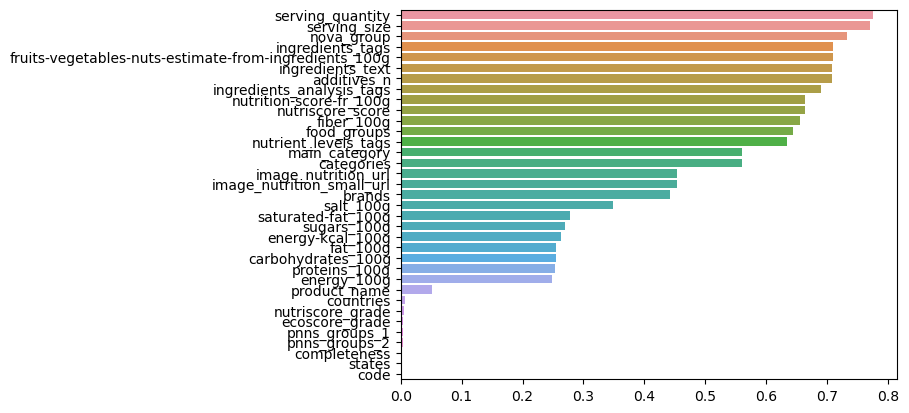

In [361]:
valeurs_manq = df.isna().mean().sort_values(ascending=False)
sns.barplot(x=valeurs_manq.values, y=valeurs_manq.index);

# Detection, modification et suppression des valeurs supérieures a 100 pour 100gr

In [363]:
def count_responses(results_df):
    return results_df.shape[0]

# Taille initiale du DataFrame
initial_size = df.shape[0]

# Liste des colonnes à vérifier
columns_to_check = [
    'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'
]

# Initialiser une liste pour stocker les résultats
results = []

# Vérification des valeurs supérieures à 100 dans les colonnes spécifiées
for column in columns_to_check:
    # Convertir les valeurs de la colonne en float (si possible)
    df.loc[:, column] = pd.to_numeric(df[column], errors='coerce')
    values_above_100 = df[df[column] > 100][column]
    for idx, value in values_above_100.items():
        results.append((df.loc[idx, 'product_name'], column, value))

# Créer un DataFrame pour afficher les résultats
results_df = pd.DataFrame(results, columns=['product_name', 'Column', 'Value'])

# Afficher le DataFrame des résultats
print("Produits avec des valeurs supérieures à 100 :")
print(results_df)

# Compter le total de réponses
total_responses = count_responses(results_df)
print(f"Total de réponses trouvées : {total_responses}")

Produits avec des valeurs supérieures à 100 :
                          product_name     Column       Value
0                             blabblub   fat_100g       222.0
1                Chicken Shawarma Bowl   fat_100g       350.0
2                   Asparagus, risotto   fat_100g       610.0
3                   Brown Sugar Salmon   fat_100g      3400.0
4                                  Moz   fat_100g       261.0
...                                ...        ...         ...
6029  Zeb Zen Prawn Cracker Wasabi 70g  salt_100g       820.0
6030                               NaN  salt_100g       125.0
6031               GF Ivory Teff Wraps  salt_100g       800.0
6032             учебник по математика  salt_100g  99999999.0
6033     Extra lean raw ground chicken  salt_100g       200.0

[6034 rows x 3 columns]
Total de réponses trouvées : 6034


In [364]:
unique_product_counts = df['product_name'].value_counts()
print("Valeurs uniques dans la colonne 'product_name' et leur nombre :")
print(unique_product_counts)

Valeurs uniques dans la colonne 'product_name' et leur nombre :
product_name
Miel                                     1827
Aceite de oliva virgen extra             1632
Filet de poulet                          1445
Spaghetti                                1303
Chocolat                                 1253
                                         ... 
Blédine + blé & vanille                     1
Gallia PROCESA                              1
Céréales complètes au Cacao                 1
Mini matin céréales complètes au miel       1
Light & Free SKYR A BOIRE                   1
Name: count, Length: 1946228, dtype: int64


In [365]:
columns_to_check = [
    'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'
]

# Convertir les valeurs des colonnes en float (si possible)
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Calculer les moyennes des colonnes en fonction de 'product_name'
means = df.groupby('product_name')[columns_to_check].transform('mean')

# Remplacer les valeurs supérieures à 100 par la moyenne correspondante
for column in columns_to_check:
    df[column] = np.where(df[column] > 100, means[column], df[column])

# Vérifier les valeurs supérieures à 100 après correction
values_above_100 = df[columns_to_check] > 100
count_above_100 = values_above_100.sum().sum()
print(f"Nombre de valeurs supérieures à 100 après correction : {count_above_100}")

# Supprimer les lignes contenant des valeurs supérieures à 100
df.drop(index=df[values_above_100.any(axis=1)].index, inplace=True)

# Afficher le DataFrame modifié
print("DataFrame après suppression des valeurs supérieures à 100 :")
print(df)

/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_9945/3646987315.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')
/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_9945/3646987315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] > 100, means[column], df[column])


Nombre de valeurs supérieures à 100 après correction : 4671


/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_9945/3646987315.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=df[values_above_100.any(axis=1)].index, inplace=True)


DataFrame après suppression des valeurs supérieures à 100 :
                           code               product_name     brands  \
0             00000000000000225             jeunes pousses    endives   
1        0000000000000207025004                      Andrè        NaN   
2          00000000000003429145                    L.casei        NaN   
3          00000000000026772226                       Skyr     Danone   
4                 0000000000017           Vitória crackers        NaN   
...                         ...                        ...        ...   
3307654              9999999999            Duschgel - Iris        NaN   
3307655             99999999999        Sugo alle Melanzone  La Vialla   
3307656            999999999999       Test Product Product        MTR   
3307657           9999999999994  Light & Free SKYR A BOIRE        NaN   
3307658           9999999999999                 Salatgurke      Edeka   

                                                categories   co

In [366]:
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Compteur pour les valeurs modifiées
modified_count = 0

# Utiliser IterativeImputer pour remplacer les NaN
imputer = IterativeImputer(random_state=0)
df_imputed = imputer.fit_transform(df[columns_to_check])

# Compter les valeurs modifiées
for col in columns_to_check:
    modified_count += df[col].isna().sum() - np.isnan(df_imputed[:, columns_to_check.index(col)]).sum()

# Remplacer les valeurs NaN dans le DataFrame d'origine
df[columns_to_check] = df_imputed

# Afficher le DataFrame final après imputation
print("DataFrame après imputation itérative :")
print(df)

# Afficher le nombre de valeurs modifiées
print(f"Nombre de valeurs modifiées : {modified_count}")

/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_9945/2341125830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')
/opt/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_9945/2341125830.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

DataFrame après imputation itérative :
                           code               product_name     brands  \
0             00000000000000225             jeunes pousses    endives   
1        0000000000000207025004                      Andrè        NaN   
2          00000000000003429145                    L.casei        NaN   
3          00000000000026772226                       Skyr     Danone   
4                 0000000000017           Vitória crackers        NaN   
...                         ...                        ...        ...   
3307654              9999999999            Duschgel - Iris        NaN   
3307655             99999999999        Sugo alle Melanzone  La Vialla   
3307656            999999999999       Test Product Product        MTR   
3307657           9999999999994  Light & Free SKYR A BOIRE        NaN   
3307658           9999999999999                 Salatgurke      Edeka   

                                                categories   countries  \
0        A